<a href="https://colab.research.google.com/github/gustavoramos82/An-lise-de-discurso-de-dio/blob/main/Termos_discurso_de_%C3%B3dio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise e comparação dos termos  de discurso de ódio

Neste notebook, a pertir do dataset obtido no kaggle (que pode ser acessado [aqui](https://www.kaggle.com/datasets/waalbannyantudre/hate-speech-detection-curated-dataset?select=HateSpeechDataset.csv)) cujo objetivo aqui é identificar os termos e quais as diferenças nos termos sem um discurso de  ódio e com discurso de ódio e se tem uma diferença nos termos, que vais acontecer em duas partes:

- **Análise mais geral**: vamos dividir os termos em os que tem os discursos e os que não tem e fazer uma nuvem de palavras
- **Análise de cluster**: Será aplicado umka análise de cluster para identificar qual seria os principais termos mais utilizado que não poderia ser visto em uma análise mais geral.

Como diferencial srá feito a análise com duas abordagens: um com a transformação só com contagem de palavra e outros no método embedding para verificar se isso influencia na análise ou não

In [28]:
# Importando as blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import string
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer

In [2]:
# Importando o dataset
discurso_odio = pd.read_csv('/content/drive/MyDrive/Datasets/HateSpeechDataset.csv')
discurso_odio.head()

,Content,Label,Content_int
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]"


Quanto aos ao sigingificado das colunas **Content** é o conteúdo do texto e o **Label** se for 0 quer dizer que o contúdo não tem discurso de ódio e 1 quer dizer que tem

In [3]:
discurso_odio.drop('Content_int',axis=1,inplace=True)
discurso_odio.head()

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


<Axes: xlabel='Label', ylabel='count'>

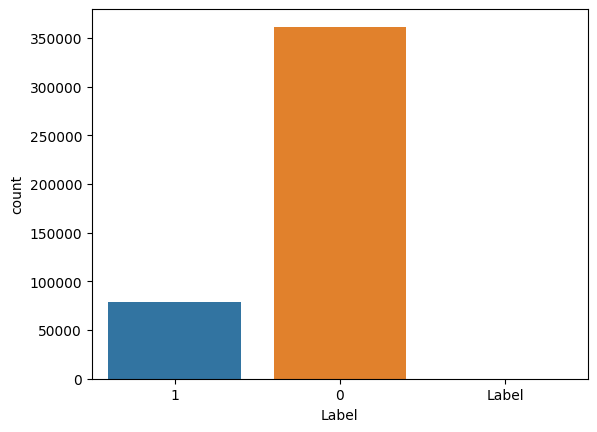

In [4]:
sns.countplot(x='Label',data=discurso_odio)

In [5]:
discurso_odio['Label'].unique()

array(['1', '0', 'Label'], dtype=object)

In [6]:
discurso_odio[discurso_odio['Label']=='Label']

,Content,Label
190108,content,Label
418486,content,Label
422333,content,Label
424241,content,Label
426162,content,Label
435474,content,Label
437104,content,Label


Foi identificado que tem esses termos no dataframe, pode ser que pode ser colocado por engano, então vamos filtrarar o datrafreme tirando esses elementos

In [7]:
discurso_odio = discurso_odio[discurso_odio['Label']!='Label']
discurso_odio.head()

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


Text(0.5, 0, '')

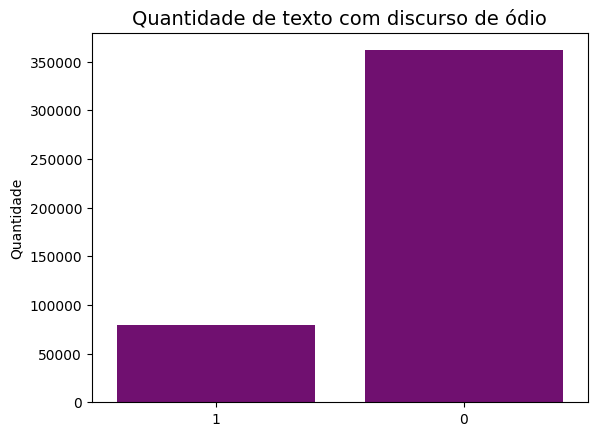

In [8]:
plt.title('Quantidade de texto com discurso de ódio',
          fontsize=14)
sns.countplot(x='Label',data=discurso_odio,color='purple')
plt.ylabel('Quantidade')
plt.xlabel('')

Podemos ver que a maioria dos texto não tem discurso de ódio se comparado aos qaue tem

In [9]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
discurso_odio['Content'] = discurso_odio['Content'].apply(clean)

In [11]:
discurso_odio


,Content,Label
0,denial normal con ask comment tragedi emot retard,1
1,abl tweet insuffer bullshit prove trump nazi v...,1
2,retard cute singl life,1
3,thought real badass mongol style declar war at...,1
4,afro american basho,1
...,...,...
440901,crash anoth movi left field ask star war episo...,0
440902,debat first start edit war,0
440903,remov revert remov section believ misguid remo...,0
440904,unblock eddi discuss user talkabl accus nile a...,0


In [12]:
discurso_odio['Label'] = discurso_odio['Label'].astype(int)
discurso_odio.head()

,Content,Label
0,denial normal con ask comment tragedi emot retard,1
1,abl tweet insuffer bullshit prove trump nazi v...,1
2,retard cute singl life,1
3,thought real badass mongol style declar war at...,1
4,afro american basho,1


## Análise inicial

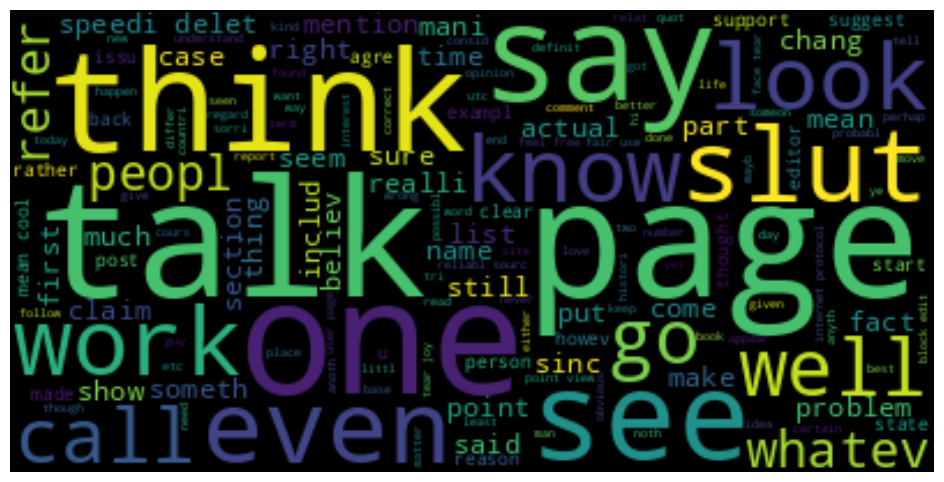

In [13]:
sem_odio = " ".join(i for i in discurso_odio[discurso_odio['Label']==0]['Content'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(sem_odio)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

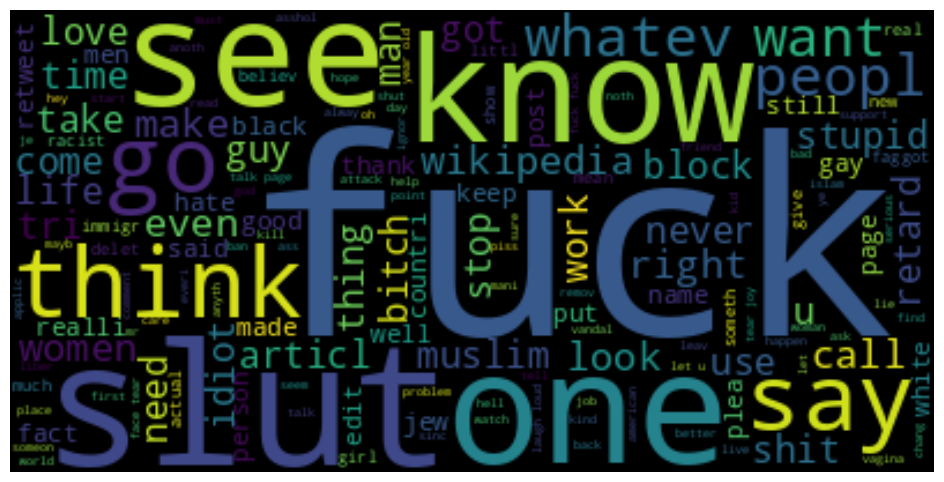

In [14]:
odio = " ".join(i for i in discurso_odio[discurso_odio['Label']==1]['Content'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(odio)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
vectorizer = CountVectorizer()
docs0  = vectorizer.fit_transform(discurso_odio[discurso_odio['Label']==0]['Content'])
features0 = vectorizer.get_feature_names_out()

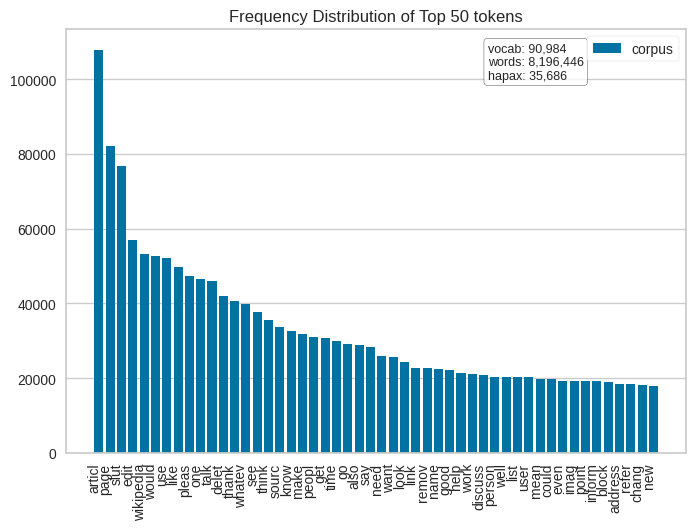

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [32]:
visualizer0 = FreqDistVisualizer(features=features0, orient='v')
visualizer0.fit(docs0)
visualizer0.show()

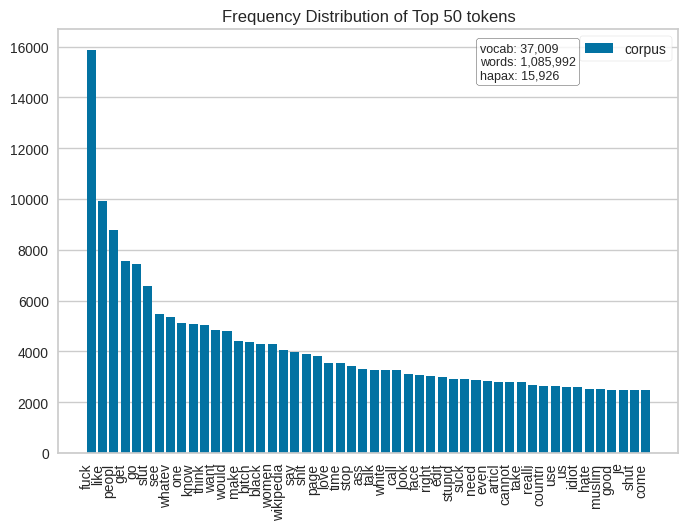

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [33]:
docs1  = vectorizer.fit_transform(discurso_odio[discurso_odio['Label']==1]['Content'])
features1 = vectorizer.get_feature_names_out()
visualizer1 = FreqDistVisualizer(features=features1, orient='v')
visualizer1.fit(docs1)
visualizer1.show()

Com essas informações obtidas acimas, e para uma melhor análise ser´=a separa os comentário sem ódio e com ódio

In [34]:
mensagem_sem_odio = discurso_odio[discurso_odio['Label']==0]['Content']
mensagem_com_odio = discurso_odio[discurso_odio['Label']==1]['Content']

In [35]:
mensagem_sem_odio.to_csv('Mensagem sem ódio.csv')
mensagem_com_odio.to_csv('Mensagem com ódio.csv')